### The Sparks Foundation Data Science and Business Analytics Internship
### Task 2:Prediction using Unsupervised Machine Learning
#### Author: Gowri S

 In this execise we will be using the python code to predict the optimum number of clustering groups from the given iris data set as input using the unsupervised machine learning kMeans algorithm .In unsupervised learning we dont know about the underlying structure.Our target is to find some structure to our data set or the optimum number of cluster. I will be describing the process in different steps.


### Step-1: Importing the libraries
Here I have launched the jupiter notebook and have imported some of the necessary libraries for data analysis and visualization. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Step-2: Load the datasets
Here we are loading data set from sklearn library.for that we need to import sklearn library first. 

In [2]:
from sklearn.datasets import load_iris
iris_cluster=load_iris()
dir(iris_cluster)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris_df=pd.DataFrame(iris_cluster.data,columns=iris_cluster.feature_names)

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris_target1=pd.DataFrame(iris_cluster.target,columns=['true_Cluster'])
iris_target1

,true_Cluster
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Step-3: Data analysis
Here we are analysing the dataframe structure ,data types 

In [6]:
iris_df.shape

(150, 4)

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
iris_targets=pd.DataFrame(iris_cluster.target_names,columns=['target'])
iris_targets

,target
0,setosa
1,versicolor
2,virginica


In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_target1.shape

(150, 1)

To see the correlation between different features will help us reduce the dimensionality of the given data set.Its a technique in feature engineering.So by analysing these correlation data and its visualization matrix we can understant that all these features are not necessary for determining the optimum cluster.So we consider each of the differnt scenerio

In [11]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

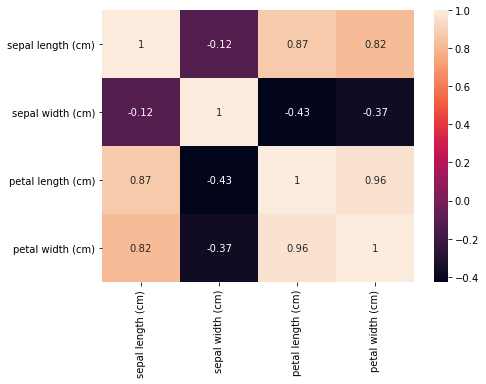

In [12]:
plt.figure(figsize=(7,5))
sn.heatmap(iris_df.corr(),annot=True)

### Step-4: Visualization

For the ease of visualisation we will be analysinf only two features at a time.To know each combination I am using a pairplot

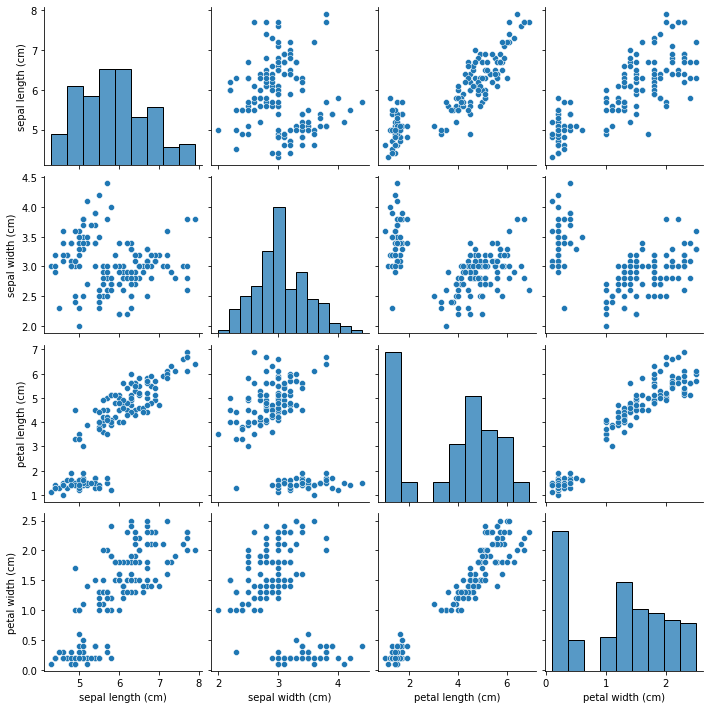

In [13]:
sn.pairplot(iris_df)

### Step-5:Model Building  
For clustering we will be importing kmeans from sklearn library.

All these combinations are showing some sort of clustering so we need to look for the optimum number of clusters.
Here we will import the necessary library for the kmean algorithm.Lets take range of cluster value to be 1-10.we will create km  as the object for each cluster value.

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [15]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

To know the best cluster here we are calculating the sum of squared error of each data set  from centroid.It will automatically decrease to zero as custer number increases and approches the number of data points.The general guideline to find the optimum is called elbow technique.We will be choosing the elbow point from the sum of squared error verses cluste number plot. 

In [16]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 35.145184194890085,
 30.137843073593086,
 28.024976812661045]

Text(0.5, 1.0, 'Elbow Method')

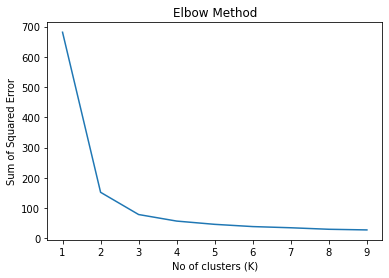

In [17]:
plt.plot(k_rng,sse)
plt.xlabel('No of clusters (K)')
plt.ylabel('Sum of Squared Error')
plt.title("Elbow Method")

From this we choose optimum cluster number as 3.For k=3 we will analyse how well custering fits 

In [18]:
km0=KMeans(n_clusters=3)
km0

KMeans(n_clusters=3)

In [19]:
y_predicted=km0.fit_predict(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y_predicted
iris_df['clusters']=y_predicted
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Step-5:Model Visualization  

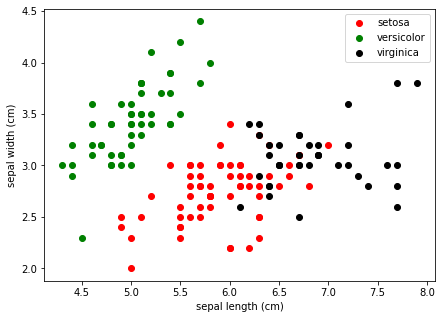

In [20]:
plt.figure(figsize=(7,5))
df1=iris_df[iris_df.clusters==0]
df2=iris_df[iris_df.clusters==1]
df3=iris_df[iris_df.clusters==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='r',label='setosa')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='g',label='versicolor')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black',label='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

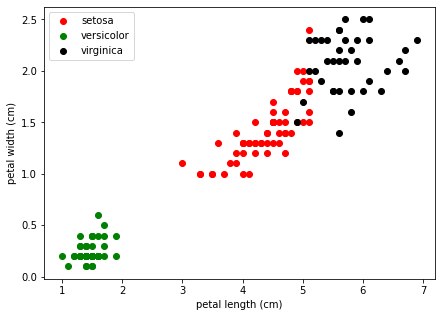

In [21]:
plt.figure(figsize=(7,5))
df1=iris_df[iris_df.clusters==0]
df2=iris_df[iris_df.clusters==1]
df3=iris_df[iris_df.clusters==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='r',label='setosa')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='g',label='versicolor')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black',label='virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

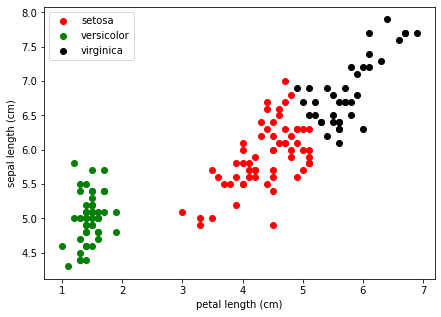

In [22]:
plt.figure(figsize=(7,5))
df1=iris_df[iris_df.clusters==0]
df2=iris_df[iris_df.clusters==1]
df3=iris_df[iris_df.clusters==2]
plt.scatter(df1['petal length (cm)'],df1['sepal length (cm)'],color='r',label='setosa')
plt.scatter(df2['petal length (cm)'],df2['sepal length (cm)'],color='g',label='versicolor')
plt.scatter(df3['petal length (cm)'],df3['sepal length (cm)'],color='black',label='virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.legend()
plt.show()

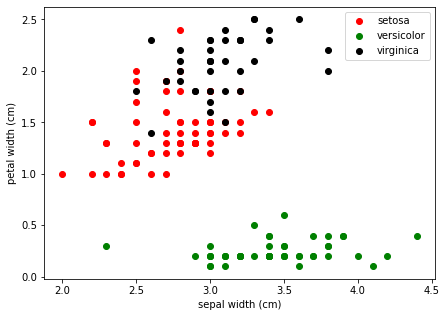

In [23]:
plt.figure(figsize=(7,5))
df1=iris_df[iris_df.clusters==0]
df2=iris_df[iris_df.clusters==1]
df3=iris_df[iris_df.clusters==2]
plt.scatter(df1['sepal width (cm)'],df1['petal width (cm)'],color='r',label='setosa')
plt.scatter(df2['sepal width (cm)'],df2['petal width (cm)'],color='g',label='versicolor')
plt.scatter(df3['sepal width (cm)'],df3['petal width (cm)'],color='black',label='virginica')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()